# More Examples 

Any user of Webbpsf is invited to submit snippets of example code for sharing here.

The following examples all assume you have started with

In [1]:
import webbpsf
import numpy as np
# if running in a Jupyter notebook also do:
%pylab inline  

Populating the interactive namespace from numpy and matplotlib


Examples are organized by topic

## Typical Usage Cases

### Displaying a PSF as an image and as an encircled energy plot

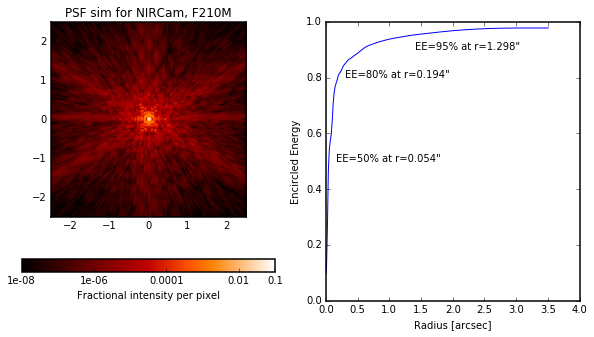

In [5]:
# create a NIRCam instance and calculate a PSF for F210M
nircam = webbpsf.NIRCam()
nircam.filter = 'F210M'
psf210 = nircam.calc_psf(oversample=2)

# display the PSF and plot the encircled energy
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
webbpsf.display_psf(psf210, colorbar_orientation='horizontal')
axis2 = plt.subplot(1,2,2)
webbpsf.display_ee(psf210, ax=axis2)

psf210.writeto('nircam_F210M.fits', clobber=True)
plt.savefig('plot_nircam_f210m.pdf')

### Iterating over multiple OPDs and filters

Perhaps you want to calculate PSFs for all filters of a given instrument, using all available simulated OPDs:

In [7]:
def niriss_psfs():
    niriss = webbpsf.NIRISS()
    opdname = niriss.pupilopd

    for i in range(10):
        niriss.pupilopd = (opdname,i)
        for filtname in niriss.filter_list:
            niriss.filter=filtname
            fov=18
            outname = "PSF_NIRISS_%scen_wfe%d.fits" % (filtname, i)
            psf = niriss.calc_psf(outname, niriss, nlambda=1,
                                           oversample=4, fov_arcsec=fov, rebin=True, display=True)


### Create monochromatic PSFs across an instrument’s entire wavelength range

Monochromatic PSFs with steps of 0.1 micron from 5-28.3 micron.

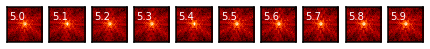

In [13]:
m = webbpsf.MIRI()
m.pupilopd = 'OPD_RevV_miri_421.fits'       # select an OPD
                                            # looks inside $WEBBPSF_DATA/MIRI/OPD by default
                                             # or you can specify a full path name.
m.options['parity'] = 'odd'                 # please make an output PSF with its center
                                             # aligned to the center of a single pixel

waves = np.linspace(5.0, 28.3, 234)*1e-6     # iterate over wavelengths in meters
waves=waves[0:10]
plt.figure(figsize=(12,12))

for iw, wavelength in enumerate(waves):
    psffile = 'PSF_MIRI_mono_%.1fum_revV_opd1.fits' % (wavelength*1e6)
    psf = m.calc_psf(fov_arcsec=10, oversample=2, rebin=True, monochromatic=wavelength, display=False,
               outfile=psffile)
    ax = plt.subplot(16,16,iw+1)
    webbpsf.display_psf(psffile, ext='DET_SAMP', colorbar=False, imagecrop=8)
    ax.set_title('')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.text(-3.5, 1, '{0:.1f}'.format(wavelength*1e6), color='white')


## Spectroscopic PSFs, Slit and Slitless

Note that WebbPSF does not compute dispersed spectroscopic PSFs, but you can compute monochromatic PSFs and combine them yourself with an appropriate dispersion model.

###  NIRSpec fixed slits

In [15]:
plt.figure(figsize=(8, 12))
nspec = webbpsf.NIRSpec()
nspec.image_mask = 'S200A1' # 0.2 arcsec slit

psfs = {}
for wave in [0.6e-6, 1e-6, 2e-6, 3e-6]:
    psfs[wave] = nspec.calcPSF(monochromatic=wave, oversample=4)

for i, wave in enumerate([0.6e-6, 1e-6, 2e-6, 3e-6]):
    pl.subplot(1, 4, i+1)
    webbpsf.display_psf(psfs[wave], colorbar=False, imagecrop=2,
                        title='NIRSpec S200A1 at {0:.1f} $\mu m$'.format(wave*1e6))
pl.savefig('example_nirspec_slitpsf.png')

NameError: name 'pl' is not defined